In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
titanic = pd.read_csv('D:\\python lab\\kaggletitanicdataset-traincsv.zip')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.shape

(891, 12)

In [3]:
print(titanic.isnull().values.any())

True


In [4]:
nan_cols = titanic.columns[titanic.isnull().any()]
titanic[nan_cols].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Q.3 Statistical information of all numeric columns

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
titanic['Age'].mean()

29.69911764705882

In [9]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

# Q.4 Analysing Age column and fixing null values with mean

In [10]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
titanic['Age'].mean()

29.69911764705882

In [12]:
titanic['Age'].fillna(29.70 , inplace = True)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic[nan_cols].isnull().sum()

Age           0
Cabin       687
Embarked      2
dtype: int64

# Q.5 Data Bining : Creating an extra column Age Group. Using following informaton.
  
     

Child - 0 to 12 ; 
Adolescence - 13 to 18 ;
Adult - 19 - 40 ;
Midlle Age - 41 to 60 ;
Senior - 61 to 75 ;
Very Senior - 76 and above ; 

In [15]:
titanic['Age'].max()

80.0

In [16]:
#define bins
bins = [0 , 12 , 18 , 40 , 60 , 75 , 80]
#names of groups
group_names = ['Child' ,'Adolescence' , 'Adult' , 'Midlle Age' , 'Senior' , 'Very Senior']

titanic['Age_Group'] = pd.cut(titanic['Age'] , bins , labels = group_names)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [17]:
titanic['Age_Group'].head(200)

0           Adult
1           Adult
2           Adult
3           Adult
4           Adult
          ...    
195    Midlle Age
196         Adult
197    Midlle Age
198         Adult
199         Adult
Name: Age_Group, Length: 200, dtype: category
Categories (6, object): [Child < Adolescence < Adult < Midlle Age < Senior < Very Senior]

# Q.6 Data Visulization

# a. Passenger survived vs Gender of passengers

In [18]:
gender = titanic.groupby('Sex')

#Female
gender_female = gender.get_group('female')
print('No of female :',gender_female['Sex'].count())
print('No of female Survived :' , gender_female['Survived'].sum())
xx = (gender_female['Sex'].count() - gender_female['Survived'].sum())
print('No. of female not Surived : ', xx )

No of female : 314
No of female Survived : 233
No. of female not Surived :  81


In [19]:
gender = titanic.groupby('Sex')

#Male
gender_male = gender.get_group('male')
print('No of male :' ,gender_male['Sex'].count())
print('No. of male : ', gender_male['Survived'].sum())
xy = (gender_male['Sex'].count() - gender_male['Survived'].sum())
print('No. of males not survived : ' , xy)

No of male : 577
No. of male :  109
No. of males not survived :  468


In [20]:
import numpy as panda
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Gender',fontsize = 15)
ax.set_ylabel('Survived',fontsize = 15)
ax.set_title('Gender v/s Survived',fontsize = 20)

height =  (gender_female['Survived'].sum(),gender_male['Survived'].sum())
bars = ['Female' , 'Male']
color = ['#DC7633','#85929E']


plt.ylim(0,400)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)


plt.legend(bars)
plt.show()

<Figure size 800x800 with 1 Axes>

# b. Passenger survived and not-survived

In [21]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [22]:
embarked = titanic.groupby('Embarked')

embarked_S = embarked.get_group('S')
print('Total of  embarked_S  : ',embarked_S['Embarked'].count())
e_S = embarked_S['Survived'].sum()
print('Total no of embarked_S survived ',e_S)

embarked_C = embarked.get_group('C')
print('\nTotal of  embarked_C  : ',embarked_C['Embarked'].count())
e_C = embarked_C['Survived'].sum()
print('Total no of embarked_C survived ',e_C)

embarked_Q = embarked.get_group('Q')
print('\nTotal of  embarked_Q  : ',embarked_Q['Embarked'].count())
e_Q = embarked_S['Survived'].sum()
print('Total no of embarked_Q survived ',e_Q)

Total of  embarked_S  :  644
Total no of embarked_S survived  217

Total of  embarked_C  :  168
Total no of embarked_C survived  93

Total of  embarked_Q  :  77
Total no of embarked_Q survived  217


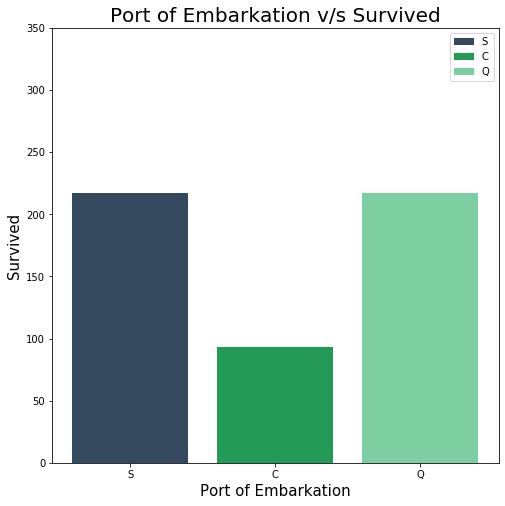

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Port of Embarkation',fontsize = 15)
ax.set_ylabel('Survived',fontsize = 15)
ax.set_title('Port of Embarkation v/s Survived',fontsize = 20)

bars = ('S','C','Q')
height = (e_S,e_C,e_Q)
color = ['#34495E','#239B56','#7DCEA0']

plt.ylim(0,350)
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    ax.bar(y_pos, height, color =color)
    
ax.legend(bars)
plt.show()

# d. Box Plot for age of passenger. Exp. Q1,Q2,Q3 values

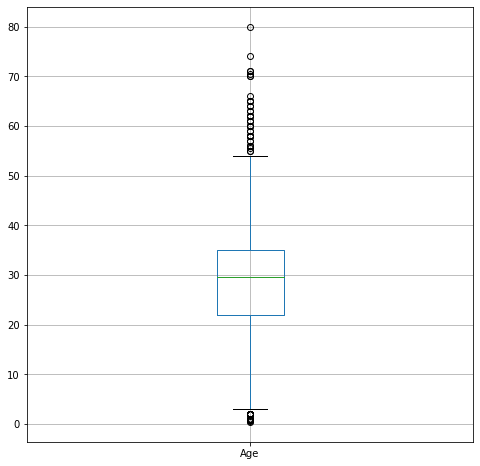

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
titanic.boxplot(column ='Age')

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

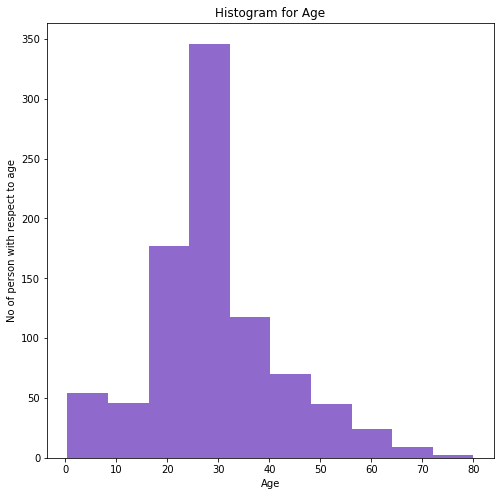

In [25]:
fig = plt.figure(figsize=(8,8))
plt.title('Histogram for Age')
plt.ylabel('No of person with respect to age')
plt.xlabel('Age')
plt.hist(titanic['Age'],color = '#9069CC')

# c. No. of passenger boarded from each port of embarkation

In [26]:
embarkation = titanic.groupby('Embarked')

embarked_S = embarkation.get_group('S')
embarked_S['Embarked'].value_counts()

S    644
Name: Embarked, dtype: int64

In [27]:
embarkation = titanic.groupby('Embarked')

embarked_C = embarkation.get_group('C')
embarked_C['Embarked'].value_counts()

C    168
Name: Embarked, dtype: int64

In [28]:
embarkation = titanic.groupby('Embarked')

embarked_Q = embarkation.get_group('Q')
embarked_Q['Embarked'].value_counts()

Q    77
Name: Embarked, dtype: int64

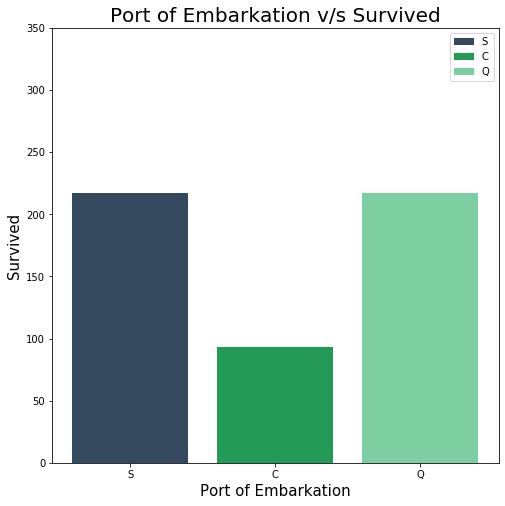

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Port of Embarkation',fontsize = 15)
ax.set_ylabel('Survived',fontsize = 15)
ax.set_title('Port of Embarkation v/s Survived',fontsize = 20)

bars = ('S','C','Q')
height = (e_S,e_C,e_Q)
color = ['#34495E','#239B56','#7DCEA0']

plt.ylim(0,350)
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    ax.bar(y_pos, height, color =color)
    
ax.legend(bars)
plt.show()

# Q.7 Data Out layers

 a. Checking limits for mild and extreme out layers for the age.

In [30]:
sorting=titanic.sort_values('Age')
sorting

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Child
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Child
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Child
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Child
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q,Senior
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C,Senior
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,Senior
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S,Senior


In [31]:
sorted(sorting.Age)

[0.42,
 0.67,
 0.75,
 0.75,
 0.83,
 0.83,
 0.92,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 13.0,
 13.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.5,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0

In [32]:
Q1 = np.quantile(titanic['Age'],0.25)
Q2 = np.quantile(titanic['Age'],0.50)
Q3 = np.quantile(titanic['Age'],0.75)

IQR = Q3-Q1

lif = Q1 - 1.5*IQR
uif = Q3 + 1.5*IQR
lif = Q1 - 3*IQR
uif = Q3 + 3*IQR

print('Mild Outlier', lif)
print('Exteme Outlier', uif)

Mild Outlier -17.0
Exteme Outlier 74.0


In [33]:
q1,q3=np.percentile(sorting.Age,[25,75])

In [34]:
q1

22.0

In [35]:
q3

35.0

In [36]:
iqr=q3-q1

In [37]:
iqr

13.0

In [38]:
titanic['Age'].describe()

count    891.000000
mean      29.699293
std       13.002015
min        0.420000
25%       22.000000
50%       29.700000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
# for mild otliers lower range
mild_lower_bound=q1-(1.5*iqr)
print('lower range of mild outliers - ',mild_lower_bound)

lower range of mild outliers -  2.5


In [40]:
# for mild otliers upper range
mild_upper_bound=q3+(1.5*iqr)
print('upper range of mild outliers - ',mild_upper_bound)

upper range of mild outliers -  54.5


In [41]:
# for extreme otliers lower range
extreme_lower_bound=q1-(3*iqr)
print('lower range of extreme outliers - ',extreme_lower_bound)

lower range of extreme outliers -  -17.0


In [42]:
# for extreme otliers upper range
extreme_upper_bound=q3+(3*iqr)
print('upper range of extreme outliers - ', extreme_upper_bound)

upper range of extreme outliers -  74.0


In [43]:
print('lower limit' , mild_lower_bound)
print('upper limit' , mild_upper_bound)
outlier_m = titanic[(titanic['Age']<mild_lower_bound)|(titanic['Age']>mild_upper_bound)]
print(outlier_m["Age"])
print(type(outlier_m))

lower limit 2.5
upper limit 54.5
7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64
<class 'pandas.core.frame.DataFrame'>


In [44]:
print('lower limit' , extreme_lower_bound)
print('upper limit' , extreme_upper_bound)
outlier_e = titanic[(titanic['Age']<extreme_lower_bound)|(titanic['Age']>extreme_upper_bound)]
print(outlier_e["Age"])
print(type(outlier_e))

lower limit -17.0
upper limit 74.0
630    80.0
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>


# Q.8 Data Outliers

# a. Cal. lower and upper limit of outliers datapoints as three sigma points.

In [45]:
mean=29.7
std=12.9
z1=mean+3*std
z2=mean-3*std
print(z1)
print(z2)

68.4
-9.000000000000004


In [46]:
mu=titanic['Age'].mean()
print('mu - ', mu)

mu -  29.69929292929302


In [47]:
sigma=titanic['Age'].std()
print('sigma - ',sigma)

sigma -  13.002015230774283


In [48]:
upper_z1=mean+3*std
lower_z2=mean-3*std
print(upper_z1)
print(lower_z2)

68.4
-9.000000000000004


In [49]:
#Q8 data outliers using 3 sigma
outlier_z= titanic[(titanic['Age'] < lower_z2) | (titanic['Age'] > upper_z1 )]
#print(outlier.head())
#outlier.value_counts()
print('OUTLIER')
print(outlier_z['Age'])
print(type(outlier_z))


OUTLIER
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>


In [50]:
# Drop outliers
#import pandas as pd
#df=pd.read_csv("D:\\python33\\dataset\\titanic311.csv")
print(titanic.shape)
print(type(titanic))

#index_names=titanic[outlier_z].index
#printindex_names
#drop(outlier_z).reset_index(drop=True)
#print(df)

(891, 13)
<class 'pandas.core.frame.DataFrame'>


In [51]:
newdata= titanic[(titanic['Age'] > lower_z2) | (titanic['Age'] < upper_z1 ) ]
#print(outlier.head())
#outlier.value_counts()
print('Newdata')
#print(outlier_z['age'])
print(type(newdata))

Newdata
<class 'pandas.core.frame.DataFrame'>


In [52]:
# Determine a list of indices of outliers for feature col
outlier_z= titanic[(titanic['Age'] < lower_z2) | (titanic['Age'] > upper_z1 )].index
       
        # append the found outlier indices for col to the list of outlier indices 
#outlier_indices.extend(outlier_z)

In [53]:
titanic = titanic.drop(outlier_z, axis = 0).reset_index(drop=True)

In [54]:
print(titanic.shape)

(884, 13)


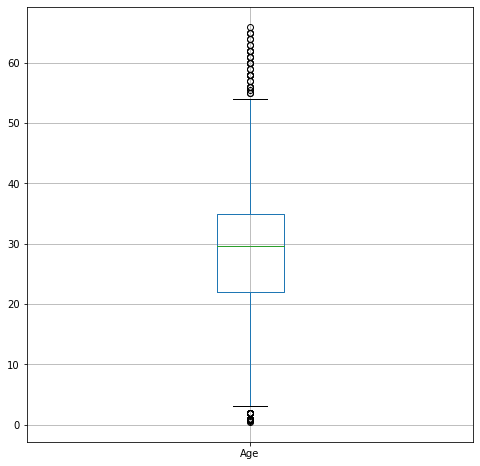

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
titanic.boxplot(column ='Age')

(array([ 47.,  24., 108., 140., 321.,  88.,  65.,  47.,  25.,  19.]),
 array([ 0.42 ,  6.978, 13.536, 20.094, 26.652, 33.21 , 39.768, 46.326,
        52.884, 59.442, 66.   ]),
 <a list of 10 Patch objects>)

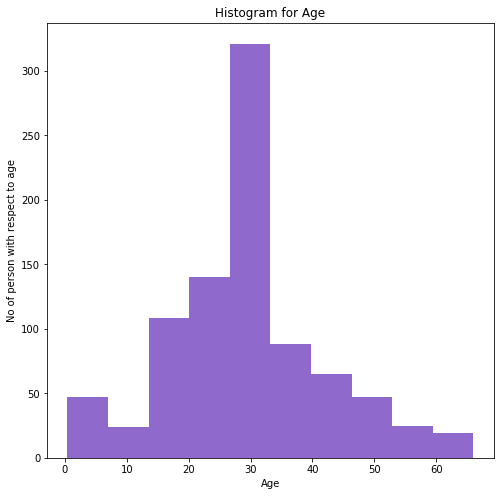

In [56]:
fig = plt.figure(figsize=(8,8))
plt.title('Histogram for Age')
plt.ylabel('No of person with respect to age')
plt.xlabel('Age')
plt.hist(titanic['Age'],color = '#9069CC')

In [57]:
titanic.shape

(884, 13)

In [58]:
new_titanic = pd.get_dummies(titanic.Sex)    #Creating dummies
print(new_titanic)
new_titanic = pd.concat([titanic ,new_titanic] , axis = 1)
print(new_titanic)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
879       0     1
880       1     0
881       1     0
882       0     1
883       0     1

[884 rows x 2 columns]
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
879          887         0       2   
880          888         1       1   
881          889         0       3   
882          890         1       1   
883          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26

In [59]:
new_titanic1 = pd.get_dummies(titanic.Embarked)    #Creating dummies
print(new_titanic1)
new_titanic1 = pd.concat([new_titanic ,new_titanic1] , axis = 1)
print(new_titanic1)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
879  0  0  1
880  0  0  1
881  0  0  1
882  1  0  0
883  0  1  0

[884 rows x 3 columns]
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
879          887         0       2   
880          888         1       1   
881          889         0       3   
882          890         1       1   
883          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily Ma

In [60]:
new_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,1,0,0,1


In [61]:
new_titanic1.shape

(884, 18)

In [63]:
new_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,1,0,0,1


In [65]:
from sklearn import preprocessing
# create the labelencoder object
le = preprocessing.LabelEncoder()

In [66]:
encoded_value1 = le.fit_transform(new_titanic1.Sex)
print(encoded_value1)
new_titanic1['New_G'] = le.fit_transform(new_titanic1.Sex)
print(new_titanic1)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 

In [67]:
new_titanic1['Embarked'].fillna('S', inplace = True)

In [68]:
new_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          683
Embarked         0
Age_Group        0
female           0
male             0
C                0
Q                0
S                0
New_G            0
dtype: int64

In [69]:
encoded_value1 = le.fit_transform(new_titanic1.Embarked)
print(encoded_value1)
new_titanic1['New_E'] = le.fit_transform(new_titanic1.Embarked)
print(new_titanic1)

[2 0 2 2 2 1 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 0 2 1 2 0 0 1 2 0 2 0
 2 2 0 2 2 0 0 1 2 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0
 2 2 0 2 2 0 2 2 2 0 2 2 0 1 2 0 2 0 2 2 2 2 0 2 2 2 0 0 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 0 2 2 2 2 1
 2 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 1 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 0 2 1
 2 2 2 1 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 1 2 2 2 2 0 2 2 2 1 2 0 0 2 2 0 0 2
 2 0 1 1 2 1 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 1 2 2 0 2 2 2 0 1 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 1 1 2 0 0 2 1 2 0 0 1 0 0 2
 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 2 2 0 

In [70]:
new_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,female,male,C,Q,S,New_G,New_E
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,1,0,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0,0,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,1,0,0,1,1,2


In [71]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
X=pd.DataFrame(new_titanic1[[  'Age' , 'Pclass' , 'SibSp' , 'Fare' , 'Parch' ]])
y=pd.DataFrame(new_titanic1['Survived'])

In [72]:
# Split the data in 80/20 proportion
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
X_train.shape

(707, 5)

In [74]:
X_test.shape

(177, 5)

In [75]:
y_train.shape

(707, 1)

In [76]:
y_test.shape

(177, 1)

In [77]:
# Model Fitting
# Now using logistic Regression on trainig data

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [78]:
cla_log = LogisticRegression()
cla_log.fit(X_train , y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# for prediction
target_log = cla_log.predict(X_test)          #target_log = y_predict

In [80]:
print(target_log)

[0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


In [81]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , target_log)
print(confusion_matrix)

[[98 16]
 [38 25]]


In [82]:
#accuracy
metrics.accuracy_score(y_test , target_log)

0.6949152542372882

In [83]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
X=pd.DataFrame(new_titanic1[[  'Age' , 'Pclass' , 'Fare' ,'female','male','C','Q','S' ,'Parch']])
y=pd.DataFrame(new_titanic1['Survived'])

In [84]:
# Split the data in 80/20 proportion
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
X_train.shape

(707, 9)

In [86]:
X_test.shape

(177, 9)

In [87]:
y_train.shape

(707, 1)

In [88]:
y_test.shape

(177, 1)

In [89]:
# Model Fitting
# Now using logistic Regression on trainig data

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [90]:
cla_log = LogisticRegression()
cla_log.fit(X_train , y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
# for prediction
target_log = cla_log.predict(X_test)          #target_log = y_predict

In [92]:
print(target_log)

[1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1]


In [93]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , target_log)
print(confusion_matrix)

[[96 18]
 [18 45]]


In [94]:
#accuracy
metrics.accuracy_score(y_test , target_log)

0.7966101694915254